In [62]:
import yfinance as yf
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from finance_utils.utils import *

In [45]:
tsla = yf.download('TSLA', start='2019-07-01')
tsla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,15.347333,15.540000,15.085333,15.144667,15.144667,123201000
2019-07-02,15.259333,15.276667,14.814667,14.970000,14.970000,138885000
2019-07-03,15.959333,16.104668,15.634000,15.660000,15.660000,213016500
2019-07-05,15.638000,15.696667,15.386667,15.540000,15.540000,105985500
2019-07-08,15.416000,15.483333,15.244000,15.356000,15.356000,88207500
...,...,...,...,...,...,...
2024-07-15,255.970001,265.600006,251.729996,252.639999,252.639999,146912900
2024-07-16,255.309998,258.619995,245.800003,256.559998,256.559998,126332500
2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800


In [73]:
# ---- test for monthly return ----
def monthly_return(df: pd.Series) -> pd.Series:
    monthly = (df.resample('ME').last() - df.resample('ME').first()) / df.resample('ME').first()

    return monthly.rename("Monthly Return")

In [74]:
m = monthly_return(tsla['Adj Close'])
m

Date
2019-07-31    0.063565
2019-08-31   -0.035236
2019-09-30    0.070486
2019-10-31    0.287016
2019-11-30    0.053078
                ...   
2024-03-31   -0.132501
2024-04-30    0.045999
2024-05-31   -0.010612
2024-06-30    0.122469
2024-07-31    0.162585
Freq: ME, Name: Monthly Return, Length: 61, dtype: float64

In [79]:
def yearly_return(df: pd.Series) -> pd.Series:
    yearly = (df.resample('YE').last() - df.resample('YE').first()) / df.resample('YE').first()

    return yearly.rename("Yearly Return")

In [80]:
yearly_return(tsla['Adj Close'])

Date
2019-12-31    0.841484
2020-12-31    7.200506
2021-12-31    0.448100
2022-12-31   -0.691994
2023-12-31    1.298612
2024-12-31   -0.017873
Freq: YE-DEC, Name: Yearly Return, dtype: float64

In [77]:
def plot_return_heatmap(_monthly_return: pd.Series):
    # -- check input --
    if _monthly_return.name != 'Monthly Return':
        _monthly_return = monthly_return(_monthly_return)
    
    # -- reshaping --
    _df = pd.DataFrame(_monthly_return)
    _df['Year'] = _df.index.year
    _df['Month'] = _df.index.month
    _df.index = [i for i in range(_df.shape[0])]

    # -- drawing the heatmap --
    result = _df.pivot(index='Year',columns='Month',values='Monthly Return')
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(result, linewidths=0.30, annot=True)
    plt.title("Calendar Return")    

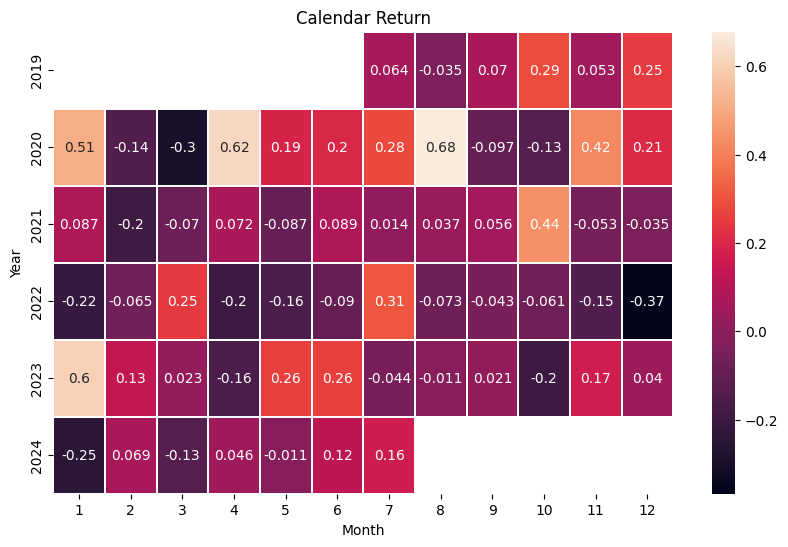

In [76]:
plot_return_heatmap(tsla['Adj Close'])

In [97]:
def plot_yearly_return(_yearly_return: pd.Series):
    # -- check input --
    if _yearly_return.name != 'Yearly Return':
        _yearly_return = yearly_return(_yearly_return)
        
    _yearly_return = round(_yearly_return, 3)
    
    # -- plotting --
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(_yearly_return.index.year, _yearly_return)
    ax.set(xlabel='Year', ylabel='Return', title='Yearly Return')
    ax.bar_label(bars)

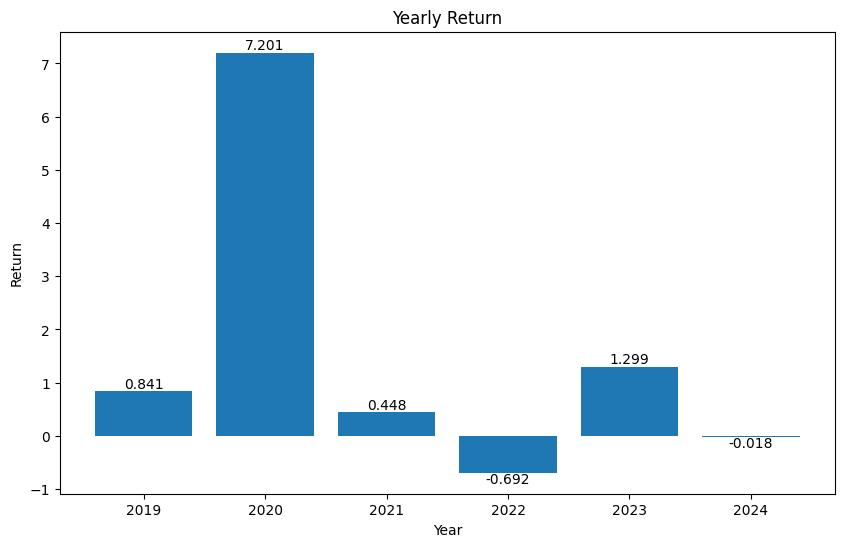

In [98]:
plot_yearly_return(yearly_return(tsla['Adj Close']))